# MCT4001 Scientific Computing in Python Session 5
![mct-banner](https://raw.githubusercontent.com/wiki/MCT-master/Guides/assets/img/mct-banner.jpg)

In [1]:
# enabling auto completion
%config IPCompleter.greedy=True

## 1. Classes and Objects

Python is an OOP language. In Python everything is an object (i.e. an instance of a specific class). To find out the class to which an object belong we, we can use the [type](https://www.geeksforgeeks.org/python-type-function/#:~:text=type()) .

In [2]:
import numpy as np

a = 1
b = 7.9
c = 'hello'
d = {'car':'driver','motorbike':'rider'}
e = np.zeros((1,10))

print('a is',type(a))
print('b is',type(b))
print('c is',type(c))
print('d is',type(d))
print('e is',type(e))

# also numners are classes, type the object name followed
# by '.' and then press tab to discover the associated methods
# or refer to the class documentation


a is <class 'int'>
b is <class 'float'>
c is <class 'str'>
d is <class 'dict'>
e is <class 'numpy.ndarray'>


We will now create a simple class from scratch. The class MyRectangle (is a good practice to name classes starting with a capital letter, objects starts with a small letter), allows to define a rectangle (uniquely defined by the size of the two sides (height and width). The class should also include methods to compute perimeter, area, scaled diagonal (the diagonal scaled by an arbitrary number, just to make a more complex example), and to sum two rectangles (we have to define what it means first)

In [3]:
# defining the class
class MyRectangle:
    height = 5
    width = 7

# creating an instance - i.e. an object - of this class
r1 = MyRectangle()

# using the class
print(r1.height)
print(r1.width)


5
7


In [4]:
# generally it is better wo allow the programmer to specify the "attributes" of a class when creating an object.
# to do this we use the __init__() function, also called "constructor" in other languages
class MyRectangle:
    def __init__(self, h, w):
        self.height = h #if an attribute name starts with _ is "protected", if starts with __ is "private"
        self.width = w

# creating an instance - i.e. an object - of this class
r1 = MyRectangle(3,4)

# using the class
print(r1.height)
print(r1.width)

# we can change the attribute acter creating the instance (unless the attribute is private)
r1.height = 88
print(r1.height)

# we can delete objects with "del" (it deletes the instance, not the class definition).
del r1

3
4
88


In [5]:
import math
# generally it is better wo allow the programmer to specify the "attributes" of a class when creating an object.
# to do this we use the __init__() function, also called "constructor" in other languages
class MyRectangle:
    def __init__(self, h, w):
        self.height = h #if an attribute name starts with _ is "protected", if starts with __ is "private"
        self.width = w

    def perimeter(self): #self must always be the first parameter of any methof of a class
                        #self is a reference to the current instance of the class, and is used
                        #to access variables that belongs to the class. It does not have to be named self 
                        #you can call it whatever you like, but it has to be the first parameter of any function in the class
        return 2 * (self.height + self.width)
        
    def area(self):
        return self.height * self.width
    
    def scaledDiagonal(self, scaleFactor):
        temp = math.sqrt(self.height**2 + self.width**2) # the operator ** is "power of"
        return temp * scaleFactor
    

# creating an instance - i.e. an object - of this class
r1 = MyRectangle(1,5)
r2 = MyRectangle(9,7.7)

print('*** r1 ***')
print('perimeter is',r1.perimeter())
print('area is',r1.area())
print('scaled diagonal by 3.7 is',r1.scaledDiagonal(3.7))
print('')

print('*** r2 ***')
print('perimeter is',r2.perimeter())
print('area is',r2.area())
print('scaled diagonal by 3.7 is',r2.scaledDiagonal(3.7))
print('')

*** r1 ***
perimeter is 12
area is 5
scaled diagonal by 3.7 is 18.866372200293302

*** r2 ***
perimeter is 33.4
area is 69.3
scaled diagonal by 3.7 is 43.824309464040624



Inneritance is an important concept in OOP, it allows us to define a "child" class from a "parent" class (the child inherit all attributes and method of the parent (i.e. we can extend a class without reinventing the wheel). In this example we create a child class MyColorRectangle from the parent MyRectangle. MyColorRectangle is the same as the parent but it has an additional private attribute "color" (we will also include methods to get and set the color).

In [6]:
# this is the parent class
class MyRectangle:
    def __init__(self, h, w):
        self.height = h 
        self.width = w

    def perimeter(self):
        return 2* (self.height + self.width)
        
    def area(self):
        return self.height * self.width
    
    def scaledDiagonal(self, scaleFactor):
        temp = math.sqrt(self.height**2 + self.width**2)
        return temp * scaleFactor

    
# this is a child class
class MyColorRectangle(MyRectangle):
    def __init__(self, h, w, c):
        MyRectangle.__init__(self, h, w)
        self.__color = c
        
    def getColor(self):
        return self.__color
    
    def setColor(self, c):
        self.__color = c

r1 = MyColorRectangle(1,5,'red')

print('perimeter is',r1.perimeter())
print('area is',r1.area())
print('scaled diagonal by 3.7 is',r1.scaledDiagonal(3.7))
print('color is',r1.getColor())
r1.setColor('green')
print('color is',r1.getColor())


perimeter is 12
area is 5
scaled diagonal by 3.7 is 18.866372200293302
color is red
color is green


We try to define a method that adds two rectangles (here we just add the respective heights and widths). We can aso "overload" the "+" operator

In [7]:
# this is the parent class
class MyRectangle:
    def __init__(self,h,w):
        self.height = h 
        self.width = w

    def perimeter(self):
        return 2* (self.height + self.width)
        
    def area(self):
        return self.height * self.width
    
    def scaledDiagonal(self,scaleFactor):
        temp = math.sqrt(self.height**2 + self.width**2)
        return temp * scaleFactor
    
    def __add__(self, other): #this method overloads (i.e. redefines) the "+"
        h = self.height + other.height
        w = self.width + other.width
        return MyRectangle(h, w)
    
    def add(self, other): #we can also use a name for this method rather than the symbol
        h = self.height + other.height
        w = self.width + other.width
        return MyRectangle(h, w)
    
    def addToSelf(self, other): #this will just add the another rectangle to itself
        self.height = self.height + other.height
        self.width = self.width + other.width
    
    
r1 = MyRectangle(1,5)
r2 = MyRectangle(2,3)

r3 = r1 + r2 #adding the two rectangles
print('r3 height',r3.height)
print('r3 width',r3.width)
print('')

r3 = MyRectangle.add(r1, r2) #adding using the alternative method (i.e. not using the + symbol)
print('r3 height',r3.height)
print('r3 width',r3.width)
print('')

r2.addToSelf(r1) #equivalent to r2 = MyRectangle.add(r1, r2)
print('new r2 height',r2.height)
print('new r2 width',r2.width)
print('')

r3 height 3
r3 width 8

r3 height 3
r3 width 8

new r2 height 3
new r2 width 8



#### Task 1

Write a class MyAudio that:
* takes the path of an audio file as required parameter of the constructor
* has a method .getSamples(start, end) that returns the samples (mono) from start to end
* has a method .dispWaveform(start, end) that display the waveform from start to end

In the above, *start* and *end* can be expressed in time or samples, and they are optional parameters. The methods should check that the value passed for stanr and end are reasonable (if not print an error message).

Verify the correct functionality of all methods.

You can (ans should) heavily rely on librosa functions, so in other words this class is just a "wrapper" for a few librosa functions.

If the above is too simple, implement also a third method *__add__* (i.e. +) that concatenates two MyAudio objects (this  implies that as soon as the object is created, you load and hold the samples in a a numpy array (which should be an attribute of the class).

## 2. Exception Handling

Synntactitally correct lines of code can still generate errors at runtime, when these are executed. These errors are called exceptions and are not unconditionally fatal. Indeed, if an exception is properly handled the program can continue its execution. Exceptions are often due to the data that the program is processing, such as an attempt to open a file that does not exist, or performing operations with not suitable data. When a program fails (and terminate) raising an exception, we can consider to modify it to make it robust and handle such exception.

In [8]:
import sys # the module sys is needed to get information about the raised exception.

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("\nThe entry is", entry)
        r = 1/int(entry)
        print('result of division', r)
    except:
        print("Exception", sys.exc_info()[0], "occurred.")


The entry is a
Exception <class 'ValueError'> occurred.

The entry is 0
Exception <class 'ZeroDivisionError'> occurred.

The entry is 2
result of division 0.5


In [9]:
# same as above without sys (using the exception object)
randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("\nThe entry is", entry)
        r = 1/int(entry)
        print('result of division', r)
    except Exception as e:
        print("Exception", e.__class__, "occurred.")


The entry is a
Exception <class 'ValueError'> occurred.

The entry is 0
Exception <class 'ZeroDivisionError'> occurred.

The entry is 2
result of division 0.5


In [10]:
import librosa

try:
    # here the offset is excessive this will trigger a ValueError exception
    signal, sr = librosa.load('./files/Drums.wav', sr=22050, mono=True, offset=1000)
except Exception as e: #this will catch all exceptions
    print("Exception", e.__class__, "occurred.")
finally:
    print('the block of code included here is always executed, no matter what')


Exception <class 'ValueError'> occurred.
the block of code included here is always executed, no matter what


/Users/stefanof/opt/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [11]:
import librosa

try:
    # here the file do not exist is excessive this will FileNotFoundError exception
    signal, sr = librosa.load('./files/donotexist.wav', sr=22050, mono=True)
except Exception as e: #this will catch all exceptions
    print("Exception", e.__class__, "occurred.")
finally:
    print('the block of code included here is always executed, no matter what')
    

Exception <class 'FileNotFoundError'> occurred.
the block of code included here is always executed, no matter what


In [12]:
import librosa

try:
    signal, sr = librosa.load('./files/donotexist.wav', sr=22050, mono=True) #generates FileNotFoundError exception
    #signal, sr = librosa.load('./files/Drums.wav', sr=22050, mono=True, offset=1000) #generates ValueError exception

# this will catch only FileNotFoundError, try to change the code above to generate a different exception and check the behavior
except FileNotFoundError as e:
    print("Exception", e.__class__, "occurred.")

print('Continuing the program... ... ')

Exception <class 'FileNotFoundError'> occurred.
Continuing the program... ... 


In [13]:
import librosa

try:
    signal, sr = librosa.load('./files/donotexist.wav', sr=22050, mono=True) #generates FileNotFoundError exception
    #signal, sr = librosa.load('./files/Drums.wav', sr=22050, mono=True, offset=1000) #generates ValueError exception

# this will catch both FileNotFoundError and ValueError
except (FileNotFoundError, ValueError) as e:
    print("Exception", e.__class__, "occurred.")

print('Continuing the program... ... ')

Exception <class 'FileNotFoundError'> occurred.
Continuing the program... ... 


For a more comprehensive tutorial on exception handling (including raising exception from the program) check out [this page](https://docs.python.org/3/tutorial/errors.html).

#### Task 2

Take problematic a piece of code that you have developed so far (for one of the earlier tasks, for assignment 1, or anything else), which execution does not complete because of an error. Try to handle the exception so that the execution completes.

Otherwise, write a for loop that open (one at a time) all files in ./files/samples with librosa.load. This will generate several exceptions that you should handle (i.e. the for loop should terminate rather than being interrupted by an error).

## 3. Scipy Signal Processing

In Scipy is an extensive python package for scientific and technical computing. Scipy also includes a rich collection of functions for [signal processing](https://docs.scipy.org/doc/scipy/reference/signal.html) (i.e. **scipy.signal**), which are highly relevant four audio processing and more in general for sound and music computing.

To a certain extent we can consider scipy.signal as a sort of "middleware" between numpy (provides basic functionalities for basic operations on arrays) and librosa (provides high level audio-specific - mostly analytical - functionalities).

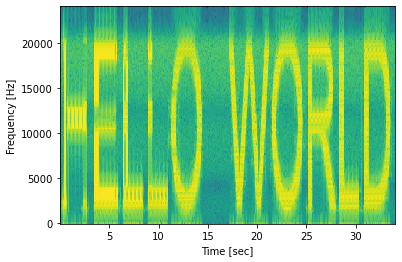

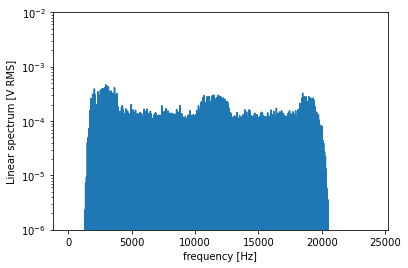

In [14]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# importing signal from scipy
from scipy import signal

np.seterr(divide = 'ignore') # ignoring eventual division by zero warnings (generated by the log10)

sr = 48000
x, sr = librosa.load('./Files/HelloWorld3.wav', sr=sr, mono=True)

# computing the spectrogram
f, t, Sxx = signal.spectrogram(x, sr)

plt.pcolormesh(t, f, 20*np.log10(Sxx)) # here we map the amplitude to dB scale with the 20*log10
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# computing the power spectrum 
f, Pxx_spec = signal.periodogram(x, sr, scaling='spectrum')

plt.semilogy(f, np.sqrt(Pxx_spec))
plt.ylim([1e-6, 1e-2])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()



#### Task 3

Briefly check out the list of [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html) functions. Select one that you are familiar with or which name does not sound too intimidating. Open its documentation and try to run it/use it on an audio signal starting from its documentation.

In the rest of the course we will cover a subset of these functions in a more systematic way.